# Cross-Check: $\mu_{\star}$ Error

We want to verify if the $\mu_{\star}$ error are consistent. For instance, they seem to be pretty large.

## Load Packages

In [1]:
import pandas as pd
import numpy as np

from astropy.table import Table, vstack
from astropy.io.fits import getdata

import matplotlib.pyplot as plt
import seaborn as sns

from collections import defaultdict

In [2]:
count=0
def save_figures(fig,count,is_tight=True,dpi=75):
    if is_tight: fig.tight_layout()
    fig.savefig('figures/crossCheckError_%i.png'%count,dpi=dpi,facecolor='w',transparent=False)

## Load Data

In [3]:
import sys
sys.path.append("/home/s1/jesteves/git/ccopa/python/")
from main import copacabana

root = '/home/s1/jesteves/git/buzzardAnalysis/mainAnalysis/'
cfg = root+'config_buzzard_v2.yaml'
copa = copacabana(cfg,dataset='buzzard_v2')

/cvmfs/des.opensciencegrid.org/fnal/anaconda2/envs/des18a/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


master file: 
 /data/des61.a/data/johnny/Buzzard/Buzzard_v2.0.0/y3/output/tiles/buzzard_v2.0.0_copa_00000.hdf5
/data/des61.a/data/johnny/Buzzard/Buzzard_v2.0.0/y3/output/tiles/buzzard_v2.0.0_copa_00016.hdf5
/data/des61.a/data/johnny/Buzzard/Buzzard_v2.0.0/y3/output/tiles/buzzard_v2.0.0_copa_00017.hdf5
/data/des61.a/data/johnny/Buzzard/Buzzard_v2.0.0/y3/output/tiles/buzzard_v2.0.0_copa_00018.hdf5
/data/des61.a/data/johnny/Buzzard/Buzzard_v2.0.0/y3/output/tiles/buzzard_v2.0.0_copa_00019.hdf5
/data/des61.a/data/johnny/Buzzard/Buzzard_v2.0.0/y3/output/tiles/buzzard_v2.0.0_copa_00020.hdf5
/data/des61.a/data/johnny/Buzzard/Buzzard_v2.0.0/y3/output/tiles/buzzard_v2.0.0_copa_00022.hdf5
/data/des61.a/data/johnny/Buzzard/Buzzard_v2.0.0/y3/output/tiles/buzzard_v2.0.0_copa_00032.hdf5
/data/des61.a/data/johnny/Buzzard/Buzzard_v2.0.0/y3/output/tiles/buzzard_v2.0.0_copa_00033.hdf5
/data/des61.a/data/johnny/Buzzard/Buzzard_v2.0.0/y3/output/tiles/buzzard_v2.0.0_copa_00034.hdf5
/data/des61.a/data/johnny

In [4]:
runs=['gauss001_rhod_02Lstar_raper50','gauss003_rhod_02Lstar_raper50']

In [5]:
catalogs = []

for run in runs:
    print('run: %s'%run)
    cat = copa.load_copa_out('cluster',run)

    mask = (cat['redshift']<0.65)&(cat['MU']>10.)&(cat['Ngals_true']>1.)

    print('masked fraction: %.2f'%(1.*np.count_nonzero(mask)/len(cat)))
    catalogs.append(cat[mask])

run: gauss001_rhod_02Lstar_raper50


/cvmfs/des.opensciencegrid.org/fnal/anaconda2/envs/des18a/lib/python2.7/site-packages/astropy/table/column.py:954: RuntimeWarning: invalid value encountered in greater
  return getattr(self.data, op)(other)


masked fraction: 0.83
run: gauss003_rhod_02Lstar_raper50
masked fraction: 0.82


In [10]:
np.percentile(np.log10(catalogs[0]['M200_true']*0.7),np.linspace(0,100,4))

array([13.54424191, 13.92716344, 14.29616801, 14.94477844])

In [6]:
def get_mustar_log(x):
    x = np.where(x<1,1,x)
    return x
## Pivot points

Mp = 10.**15.5#np.nanmedian(cat['M200_true'])
Mup= 1./10**10#np.nanmedian(cat['MU'])

print('Pivot Points')
print(r'M200: %.2e $M_{\odot}$'%Mp)
print(r'$\mu_{\star}: %.2e M_{\odot}$'%(Mup*1.0e10))

Pivot Points
M200: 3.16e+15 $M_{\odot}$
$\mu_{\star}: 1.00e+00 M_{\odot}$


In [7]:
datas  = defaultdict(dict)
for run,cat in zip(runs,catalogs):
    zcls = np.array(cat['redshift'])
    m200 = np.array(cat['M200_true']/Mp)

    mu    = get_mustar_log(cat['MU']/Mup)
    muerr = get_mustar_log(cat['MU_ERR_JK']/Mup)

    mut   = get_mustar_log(cat['MU_TRUE']/Mup)
    muterr= get_mustar_log(cat['MU_TRUE_ERR_JK']/Mup)

    ng    = np.array(cat['Ngals_flat'])
    ngt   = np.array(cat['Ngals_true'])
    
    datas[run]['x'] = m200
    datas[run]['z'] = zcls
    
    datas[run]['y1']= mu
    datas[run]['y2']= mut
    datas[run]['y1err'] = muerr
    datas[run]['y2err'] = muterr

    datas[run]['y3'] = ng
    datas[run]['y4'] = ngt        

## Plot $\mu_{\star}$ Error

This error was computed by a jackniffe techinique.

```

def jackknife_var(x, func):
    """Jackknife estiamte of the variance of the estimator func."""
    n = len(x)
    idx = np.arange(n)
    j_est = jackknife(x, func)
    return (n-1)/(n + 0.0) * np.sum((func(x[idx!=i]) - j_est)**2.0 for i in range(n))

```

The stellar mass errors was not taken into account

```
linear_mass_weight = pmem*10**mass
mu_star_err_jk = (jackknife_var(linear_mass_weight, lambda_star_jk))**0.5
```

In [8]:
mulabel = r'$\mu_{\star}$ [M$_{\odot}$]'

In [9]:
mustar = datas[run]['y1']
mustarErr = datas[run]['y1err']

mustarTrue = datas[run]['y2']

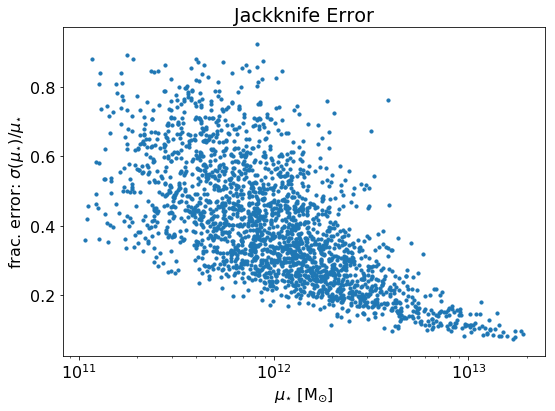

In [10]:
plt.figure(figsize=(8,6))
plt.scatter(mustar,mustarErr/mustar,s=10)
plt.xscale('log')
plt.xlabel(mulabel)
plt.ylabel('frac. error: $\sigma(\mu_{\star})/\mu_{\star}$')
plt.title('Jackknife Error')
save_figures(plt,0,is_tight=True)

In [11]:
run

'gauss003_rhod_02Lstar_raper50'

## Propagation Error

What if we prograte the $M_{\star}$ stellar mass error?

In [12]:
gal = copa.load_copa_out('members', run, is_bma=True)

clusters <HDF5 group "/clusters" (2 members)>
clusters/copa <HDF5 group "/clusters/copa" (41 members)>
clusters/copa/0.01_rhod_02Lstar_raper100 <HDF5 group "/clusters/copa/0.01_rhod_02Lstar_raper100" (27 members)>
clusters/copa/0.01_rhod_02Lstar_raper125 <HDF5 group "/clusters/copa/0.01_rhod_02Lstar_raper125" (27 members)>
clusters/copa/0.01_rhod_02Lstar_raper50 <HDF5 group "/clusters/copa/0.01_rhod_02Lstar_raper50" (27 members)>
clusters/copa/0.01_rhod_02Lstar_raper75 <HDF5 group "/clusters/copa/0.01_rhod_02Lstar_raper75" (27 members)>
clusters/copa/0.03_rhod_02Lstar_raper100 <HDF5 group "/clusters/copa/0.03_rhod_02Lstar_raper100" (27 members)>
clusters/copa/0.03_rhod_02Lstar_raper125 <HDF5 group "/clusters/copa/0.03_rhod_02Lstar_raper125" (27 members)>
clusters/copa/0.03_rhod_02Lstar_raper50 <HDF5 group "/clusters/copa/0.03_rhod_02Lstar_raper50" (27 members)>
clusters/copa/0.03_rhod_02Lstar_raper75 <HDF5 group "/clusters/copa/0.03_rhod_02Lstar_raper75" (27 members)>
clusters/copa/0.0

members/copa/gauss005_rhod_02Lstar_raper50 <HDF5 group "/members/copa/gauss005_rhod_02Lstar_raper50" (54 members)>
members/copa/gauss005_rhod_02Lstar_raper75 <HDF5 group "/members/copa/gauss005_rhod_02Lstar_raper75" (54 members)>
members/dnf <HDF5 group "/members/dnf" (8 members)>
members/gauss001 <HDF5 group "/members/gauss001" (8 members)>
members/gauss003 <HDF5 group "/members/gauss003" (8 members)>
members/gauss005 <HDF5 group "/members/gauss005" (8 members)>
members/indices <HDF5 group "/members/indices" (2 members)>
members/main <HDF5 group "/members/main" (19 members)>
Error group not found: members/bma/gauss003_rhod_02Lstar_raper50
clusters <HDF5 group "/clusters" (2 members)>
clusters/copa <HDF5 group "/clusters/copa" (45 members)>
clusters/copa/0.01_rhod_02Lstar_raper100 <HDF5 group "/clusters/copa/0.01_rhod_02Lstar_raper100" (27 members)>
clusters/copa/0.01_rhod_02Lstar_raper125 <HDF5 group "/clusters/copa/0.01_rhod_02Lstar_raper125" (27 members)>
clusters/copa/0.01_rhod_02L

members/copa/gauss001_rhod_02Lstar_raper100 <HDF5 group "/members/copa/gauss001_rhod_02Lstar_raper100" (54 members)>
members/copa/gauss001_rhod_02Lstar_raper125 <HDF5 group "/members/copa/gauss001_rhod_02Lstar_raper125" (54 members)>
members/copa/gauss001_rhod_02Lstar_raper50 <HDF5 group "/members/copa/gauss001_rhod_02Lstar_raper50" (54 members)>
members/copa/gauss001_rhod_02Lstar_raper75 <HDF5 group "/members/copa/gauss001_rhod_02Lstar_raper75" (54 members)>
members/copa/gauss003_r200_02Lstar <HDF5 group "/members/copa/gauss003_r200_02Lstar" (54 members)>
members/copa/gauss003_r200_02Lstar_dk14_nbkg_true <HDF5 group "/members/copa/gauss003_r200_02Lstar_dk14_nbkg_true" (54 members)>
members/copa/gauss003_r200_02Lstar_nfw_nbkg_true <HDF5 group "/members/copa/gauss003_r200_02Lstar_nfw_nbkg_true" (54 members)>
members/copa/gauss003_rhod_02Lstar <HDF5 group "/members/copa/gauss003_rhod_02Lstar" (54 members)>
members/copa/gauss003_rhod_02Lstar_raper100 <HDF5 group "/members/copa/gauss003_rh

clusters/copa/gauss003_rhod_02Lstar_raper25_rerun <HDF5 group "/clusters/copa/gauss003_rhod_02Lstar_raper25_rerun" (27 members)>
clusters/copa/gauss003_rhod_02Lstar_raper50 <HDF5 group "/clusters/copa/gauss003_rhod_02Lstar_raper50" (27 members)>
clusters/copa/gauss003_rhod_02Lstar_raper50_rerun <HDF5 group "/clusters/copa/gauss003_rhod_02Lstar_raper50_rerun" (27 members)>
clusters/copa/gauss003_rhod_02Lstar_raper75 <HDF5 group "/clusters/copa/gauss003_rhod_02Lstar_raper75" (27 members)>
clusters/copa/gauss003_rhod_02Lstar_raper75_rerun <HDF5 group "/clusters/copa/gauss003_rhod_02Lstar_raper75_rerun" (27 members)>
clusters/copa/gauss005_r200_02Lstar <HDF5 group "/clusters/copa/gauss005_r200_02Lstar" (27 members)>
clusters/copa/gauss005_r200_02Lstar_nfw <HDF5 group "/clusters/copa/gauss005_r200_02Lstar_nfw" (29 members)>
clusters/copa/gauss005_r200_02Lstar_nfw_nbkg_true <HDF5 group "/clusters/copa/gauss005_r200_02Lstar_nfw_nbkg_true" (27 members)>
clusters/copa/gauss005_rhod_02Lstar <HDF

members/indices <HDF5 group "/members/indices" (2 members)>
members/main <HDF5 group "/members/main" (19 members)>
Error group not found: members/bma/gauss003_rhod_02Lstar_raper50
clusters <HDF5 group "/clusters" (2 members)>
clusters/copa <HDF5 group "/clusters/copa" (57 members)>
clusters/copa/0.01_rhod_02Lstar_raper100 <HDF5 group "/clusters/copa/0.01_rhod_02Lstar_raper100" (27 members)>
clusters/copa/0.01_rhod_02Lstar_raper125 <HDF5 group "/clusters/copa/0.01_rhod_02Lstar_raper125" (27 members)>
clusters/copa/0.01_rhod_02Lstar_raper50 <HDF5 group "/clusters/copa/0.01_rhod_02Lstar_raper50" (27 members)>
clusters/copa/0.01_rhod_02Lstar_raper75 <HDF5 group "/clusters/copa/0.01_rhod_02Lstar_raper75" (27 members)>
clusters/copa/0.03_rhod_02Lstar_raper100 <HDF5 group "/clusters/copa/0.03_rhod_02Lstar_raper100" (27 members)>
clusters/copa/0.03_rhod_02Lstar_raper125 <HDF5 group "/clusters/copa/0.03_rhod_02Lstar_raper125" (27 members)>
clusters/copa/0.03_rhod_02Lstar_raper50 <HDF5 group "/c

members/copa/dnf_model_rhod_02Lstar_nfw <HDF5 group "/members/copa/dnf_model_rhod_02Lstar_nfw" (54 members)>
members/copa/dnf_r200_02Lstar_nfw <HDF5 group "/members/copa/dnf_r200_02Lstar_nfw" (54 members)>
members/copa/dnf_r200_02Lstar_nfw_nbkg_true <HDF5 group "/members/copa/dnf_r200_02Lstar_nfw_nbkg_true" (54 members)>
members/copa/dnf_rhod_02Lstar_nfw <HDF5 group "/members/copa/dnf_rhod_02Lstar_nfw" (54 members)>
members/copa/dnf_rhod_02Lstar_raper100 <HDF5 group "/members/copa/dnf_rhod_02Lstar_raper100" (54 members)>
members/copa/dnf_rhod_02Lstar_raper125 <HDF5 group "/members/copa/dnf_rhod_02Lstar_raper125" (54 members)>
members/copa/dnf_rhod_02Lstar_raper25 <HDF5 group "/members/copa/dnf_rhod_02Lstar_raper25" (54 members)>
members/copa/dnf_rhod_02Lstar_raper50 <HDF5 group "/members/copa/dnf_rhod_02Lstar_raper50" (54 members)>
members/copa/dnf_rhod_02Lstar_raper75 <HDF5 group "/members/copa/dnf_rhod_02Lstar_raper75" (54 members)>
members/copa/gauss001_r200_02Lstar <HDF5 group "/me

clusters/copa/gauss001_rhod_02Lstar <HDF5 group "/clusters/copa/gauss001_rhod_02Lstar" (27 members)>
clusters/copa/gauss001_rhod_02Lstar_nfw <HDF5 group "/clusters/copa/gauss001_rhod_02Lstar_nfw" (27 members)>
clusters/copa/gauss001_rhod_02Lstar_raper100 <HDF5 group "/clusters/copa/gauss001_rhod_02Lstar_raper100" (27 members)>
clusters/copa/gauss001_rhod_02Lstar_raper125 <HDF5 group "/clusters/copa/gauss001_rhod_02Lstar_raper125" (27 members)>
clusters/copa/gauss001_rhod_02Lstar_raper50 <HDF5 group "/clusters/copa/gauss001_rhod_02Lstar_raper50" (27 members)>
clusters/copa/gauss001_rhod_02Lstar_raper75 <HDF5 group "/clusters/copa/gauss001_rhod_02Lstar_raper75" (27 members)>
clusters/copa/gauss003_r200_02Lstar <HDF5 group "/clusters/copa/gauss003_r200_02Lstar" (27 members)>
clusters/copa/gauss003_r200_02Lstar_dk14_nbkg_true <HDF5 group "/clusters/copa/gauss003_r200_02Lstar_dk14_nbkg_true" (27 members)>
clusters/copa/gauss003_r200_02Lstar_nfw <HDF5 group "/clusters/copa/gauss003_r200_02Ls

members/copa/gauss003_rhod_02Lstar_raper125 <HDF5 group "/members/copa/gauss003_rhod_02Lstar_raper125" (54 members)>
members/copa/gauss003_rhod_02Lstar_raper125_rerun <HDF5 group "/members/copa/gauss003_rhod_02Lstar_raper125_rerun" (54 members)>
members/copa/gauss003_rhod_02Lstar_raper25 <HDF5 group "/members/copa/gauss003_rhod_02Lstar_raper25" (54 members)>
members/copa/gauss003_rhod_02Lstar_raper25_rerun <HDF5 group "/members/copa/gauss003_rhod_02Lstar_raper25_rerun" (54 members)>
members/copa/gauss003_rhod_02Lstar_raper50 <HDF5 group "/members/copa/gauss003_rhod_02Lstar_raper50" (54 members)>
members/copa/gauss003_rhod_02Lstar_raper50_rerun <HDF5 group "/members/copa/gauss003_rhod_02Lstar_raper50_rerun" (54 members)>
members/copa/gauss003_rhod_02Lstar_raper75 <HDF5 group "/members/copa/gauss003_rhod_02Lstar_raper75" (54 members)>
members/copa/gauss003_rhod_02Lstar_raper75_rerun <HDF5 group "/members/copa/gauss003_rhod_02Lstar_raper75_rerun" (54 members)>
members/copa/gauss005_r200_0

clusters/copa/gauss005_r200_02Lstar_nfw_nbkg_true <HDF5 group "/clusters/copa/gauss005_r200_02Lstar_nfw_nbkg_true" (27 members)>
clusters/copa/gauss005_rhod_02Lstar <HDF5 group "/clusters/copa/gauss005_rhod_02Lstar" (27 members)>
clusters/copa/gauss005_rhod_02Lstar_nfw <HDF5 group "/clusters/copa/gauss005_rhod_02Lstar_nfw" (27 members)>
clusters/copa/gauss005_rhod_02Lstar_raper100 <HDF5 group "/clusters/copa/gauss005_rhod_02Lstar_raper100" (27 members)>
clusters/copa/gauss005_rhod_02Lstar_raper125 <HDF5 group "/clusters/copa/gauss005_rhod_02Lstar_raper125" (27 members)>
clusters/copa/gauss005_rhod_02Lstar_raper50 <HDF5 group "/clusters/copa/gauss005_rhod_02Lstar_raper50" (27 members)>
clusters/copa/gauss005_rhod_02Lstar_raper75 <HDF5 group "/clusters/copa/gauss005_rhod_02Lstar_raper75" (27 members)>
clusters/main <HDF5 group "/clusters/main" (8 members)>
members <HDF5 group "/members" (9 members)>
members/bma <HDF5 group "/members/bma" (28 members)>
members/copa <HDF5 group "/members/c

clusters/copa/dnf_model_r200_02Lstar_nfw <HDF5 group "/clusters/copa/dnf_model_r200_02Lstar_nfw" (29 members)>
clusters/copa/dnf_model_r200_02Lstar_nfw_nbkg_true <HDF5 group "/clusters/copa/dnf_model_r200_02Lstar_nfw_nbkg_true" (27 members)>
clusters/copa/dnf_model_rhod_02Lstar_nfw <HDF5 group "/clusters/copa/dnf_model_rhod_02Lstar_nfw" (27 members)>
clusters/copa/dnf_r200_02Lstar_nfw <HDF5 group "/clusters/copa/dnf_r200_02Lstar_nfw" (27 members)>
clusters/copa/dnf_r200_02Lstar_nfw_nbkg_true <HDF5 group "/clusters/copa/dnf_r200_02Lstar_nfw_nbkg_true" (27 members)>
clusters/copa/dnf_rhod_02Lstar_nfw <HDF5 group "/clusters/copa/dnf_rhod_02Lstar_nfw" (27 members)>
clusters/copa/dnf_rhod_02Lstar_raper100 <HDF5 group "/clusters/copa/dnf_rhod_02Lstar_raper100" (27 members)>
clusters/copa/dnf_rhod_02Lstar_raper125 <HDF5 group "/clusters/copa/dnf_rhod_02Lstar_raper125" (27 members)>
clusters/copa/dnf_rhod_02Lstar_raper25 <HDF5 group "/clusters/copa/dnf_rhod_02Lstar_raper25" (27 members)>
clust

members/copa/gauss003_rhod_02Lstar_nfw <HDF5 group "/members/copa/gauss003_rhod_02Lstar_nfw" (54 members)>
members/copa/gauss003_rhod_02Lstar_raper100 <HDF5 group "/members/copa/gauss003_rhod_02Lstar_raper100" (54 members)>
members/copa/gauss003_rhod_02Lstar_raper100_rerun <HDF5 group "/members/copa/gauss003_rhod_02Lstar_raper100_rerun" (54 members)>
members/copa/gauss003_rhod_02Lstar_raper125 <HDF5 group "/members/copa/gauss003_rhod_02Lstar_raper125" (54 members)>
members/copa/gauss003_rhod_02Lstar_raper125_rerun <HDF5 group "/members/copa/gauss003_rhod_02Lstar_raper125_rerun" (54 members)>
members/copa/gauss003_rhod_02Lstar_raper25 <HDF5 group "/members/copa/gauss003_rhod_02Lstar_raper25" (54 members)>
members/copa/gauss003_rhod_02Lstar_raper25_rerun <HDF5 group "/members/copa/gauss003_rhod_02Lstar_raper25_rerun" (54 members)>
members/copa/gauss003_rhod_02Lstar_raper50 <HDF5 group "/members/copa/gauss003_rhod_02Lstar_raper50" (54 members)>
members/copa/gauss003_rhod_02Lstar_raper50_r

clusters/copa/gauss005_rhod_02Lstar_raper75 <HDF5 group "/clusters/copa/gauss005_rhod_02Lstar_raper75" (27 members)>
clusters/main <HDF5 group "/clusters/main" (8 members)>
members <HDF5 group "/members" (9 members)>
members/bma <HDF5 group "/members/bma" (28 members)>
members/copa <HDF5 group "/members/copa" (57 members)>
members/copa/0.01_rhod_02Lstar_raper100 <HDF5 group "/members/copa/0.01_rhod_02Lstar_raper100" (54 members)>
members/copa/0.01_rhod_02Lstar_raper125 <HDF5 group "/members/copa/0.01_rhod_02Lstar_raper125" (54 members)>
members/copa/0.01_rhod_02Lstar_raper50 <HDF5 group "/members/copa/0.01_rhod_02Lstar_raper50" (54 members)>
members/copa/0.01_rhod_02Lstar_raper75 <HDF5 group "/members/copa/0.01_rhod_02Lstar_raper75" (54 members)>
members/copa/0.03_rhod_02Lstar_raper100 <HDF5 group "/members/copa/0.03_rhod_02Lstar_raper100" (54 members)>
members/copa/0.03_rhod_02Lstar_raper125 <HDF5 group "/members/copa/0.03_rhod_02Lstar_raper125" (54 members)>
members/copa/0.03_rhod_02

clusters/copa/0.05_rhod_02Lstar_raper50 <HDF5 group "/clusters/copa/0.05_rhod_02Lstar_raper50" (27 members)>
clusters/copa/0.05_rhod_02Lstar_raper75 <HDF5 group "/clusters/copa/0.05_rhod_02Lstar_raper75" (27 members)>
clusters/copa/dnf_model_r200_02Lstar_nfw <HDF5 group "/clusters/copa/dnf_model_r200_02Lstar_nfw" (29 members)>
clusters/copa/dnf_model_r200_02Lstar_nfw_nbkg_true <HDF5 group "/clusters/copa/dnf_model_r200_02Lstar_nfw_nbkg_true" (27 members)>
clusters/copa/dnf_model_rhod_02Lstar_nfw <HDF5 group "/clusters/copa/dnf_model_rhod_02Lstar_nfw" (27 members)>
clusters/copa/dnf_r200_02Lstar_nfw <HDF5 group "/clusters/copa/dnf_r200_02Lstar_nfw" (27 members)>
clusters/copa/dnf_r200_02Lstar_nfw_nbkg_true <HDF5 group "/clusters/copa/dnf_r200_02Lstar_nfw_nbkg_true" (27 members)>
clusters/copa/dnf_rhod_02Lstar_nfw <HDF5 group "/clusters/copa/dnf_rhod_02Lstar_nfw" (27 members)>
clusters/copa/dnf_rhod_02Lstar_raper100 <HDF5 group "/clusters/copa/dnf_rhod_02Lstar_raper100" (27 members)>
clu

members/copa/gauss001_rhod_02Lstar_nfw <HDF5 group "/members/copa/gauss001_rhod_02Lstar_nfw" (54 members)>
members/copa/gauss001_rhod_02Lstar_raper100 <HDF5 group "/members/copa/gauss001_rhod_02Lstar_raper100" (54 members)>
members/copa/gauss001_rhod_02Lstar_raper125 <HDF5 group "/members/copa/gauss001_rhod_02Lstar_raper125" (54 members)>
members/copa/gauss001_rhod_02Lstar_raper50 <HDF5 group "/members/copa/gauss001_rhod_02Lstar_raper50" (54 members)>
members/copa/gauss001_rhod_02Lstar_raper75 <HDF5 group "/members/copa/gauss001_rhod_02Lstar_raper75" (54 members)>
members/copa/gauss003_r200_02Lstar <HDF5 group "/members/copa/gauss003_r200_02Lstar" (54 members)>
members/copa/gauss003_r200_02Lstar_dk14_nbkg_true <HDF5 group "/members/copa/gauss003_r200_02Lstar_dk14_nbkg_true" (54 members)>
members/copa/gauss003_r200_02Lstar_nfw <HDF5 group "/members/copa/gauss003_r200_02Lstar_nfw" (55 members)>
members/copa/gauss003_r200_02Lstar_nfw_nbkg_true <HDF5 group "/members/copa/gauss003_r200_02Ls

clusters/copa/gauss003_rhod_02Lstar_raper100_rerun <HDF5 group "/clusters/copa/gauss003_rhod_02Lstar_raper100_rerun" (27 members)>
clusters/copa/gauss003_rhod_02Lstar_raper125 <HDF5 group "/clusters/copa/gauss003_rhod_02Lstar_raper125" (27 members)>
clusters/copa/gauss003_rhod_02Lstar_raper125_rerun <HDF5 group "/clusters/copa/gauss003_rhod_02Lstar_raper125_rerun" (27 members)>
clusters/copa/gauss003_rhod_02Lstar_raper25 <HDF5 group "/clusters/copa/gauss003_rhod_02Lstar_raper25" (27 members)>
clusters/copa/gauss003_rhod_02Lstar_raper25_rerun <HDF5 group "/clusters/copa/gauss003_rhod_02Lstar_raper25_rerun" (27 members)>
clusters/copa/gauss003_rhod_02Lstar_raper50 <HDF5 group "/clusters/copa/gauss003_rhod_02Lstar_raper50" (27 members)>
clusters/copa/gauss003_rhod_02Lstar_raper50_rerun <HDF5 group "/clusters/copa/gauss003_rhod_02Lstar_raper50_rerun" (27 members)>
clusters/copa/gauss003_rhod_02Lstar_raper75 <HDF5 group "/clusters/copa/gauss003_rhod_02Lstar_raper75" (27 members)>
clusters/c

clusters <HDF5 group "/clusters" (2 members)>
clusters/copa <HDF5 group "/clusters/copa" (57 members)>
clusters/copa/0.01_rhod_02Lstar_raper100 <HDF5 group "/clusters/copa/0.01_rhod_02Lstar_raper100" (27 members)>
clusters/copa/0.01_rhod_02Lstar_raper125 <HDF5 group "/clusters/copa/0.01_rhod_02Lstar_raper125" (27 members)>
clusters/copa/0.01_rhod_02Lstar_raper50 <HDF5 group "/clusters/copa/0.01_rhod_02Lstar_raper50" (27 members)>
clusters/copa/0.01_rhod_02Lstar_raper75 <HDF5 group "/clusters/copa/0.01_rhod_02Lstar_raper75" (27 members)>
clusters/copa/0.03_rhod_02Lstar_raper100 <HDF5 group "/clusters/copa/0.03_rhod_02Lstar_raper100" (27 members)>
clusters/copa/0.03_rhod_02Lstar_raper125 <HDF5 group "/clusters/copa/0.03_rhod_02Lstar_raper125" (27 members)>
clusters/copa/0.03_rhod_02Lstar_raper50 <HDF5 group "/clusters/copa/0.03_rhod_02Lstar_raper50" (27 members)>
clusters/copa/0.03_rhod_02Lstar_raper75 <HDF5 group "/clusters/copa/0.03_rhod_02Lstar_raper75" (27 members)>
clusters/copa/0.0

members/copa/dnf_r200_02Lstar_nfw <HDF5 group "/members/copa/dnf_r200_02Lstar_nfw" (54 members)>
members/copa/dnf_r200_02Lstar_nfw_nbkg_true <HDF5 group "/members/copa/dnf_r200_02Lstar_nfw_nbkg_true" (54 members)>
members/copa/dnf_rhod_02Lstar_nfw <HDF5 group "/members/copa/dnf_rhod_02Lstar_nfw" (54 members)>
members/copa/dnf_rhod_02Lstar_raper100 <HDF5 group "/members/copa/dnf_rhod_02Lstar_raper100" (54 members)>
members/copa/dnf_rhod_02Lstar_raper125 <HDF5 group "/members/copa/dnf_rhod_02Lstar_raper125" (54 members)>
members/copa/dnf_rhod_02Lstar_raper25 <HDF5 group "/members/copa/dnf_rhod_02Lstar_raper25" (54 members)>
members/copa/dnf_rhod_02Lstar_raper50 <HDF5 group "/members/copa/dnf_rhod_02Lstar_raper50" (54 members)>
members/copa/dnf_rhod_02Lstar_raper75 <HDF5 group "/members/copa/dnf_rhod_02Lstar_raper75" (54 members)>
members/copa/gauss001_r200_02Lstar <HDF5 group "/members/copa/gauss001_r200_02Lstar" (54 members)>
members/copa/gauss001_r200_02Lstar_nfw <HDF5 group "/members/

clusters/copa/gauss001_rhod_02Lstar_raper100 <HDF5 group "/clusters/copa/gauss001_rhod_02Lstar_raper100" (27 members)>
clusters/copa/gauss001_rhod_02Lstar_raper125 <HDF5 group "/clusters/copa/gauss001_rhod_02Lstar_raper125" (27 members)>
clusters/copa/gauss001_rhod_02Lstar_raper50 <HDF5 group "/clusters/copa/gauss001_rhod_02Lstar_raper50" (27 members)>
clusters/copa/gauss001_rhod_02Lstar_raper75 <HDF5 group "/clusters/copa/gauss001_rhod_02Lstar_raper75" (27 members)>
clusters/copa/gauss003_r200_02Lstar <HDF5 group "/clusters/copa/gauss003_r200_02Lstar" (27 members)>
clusters/copa/gauss003_r200_02Lstar_dk14_nbkg_true <HDF5 group "/clusters/copa/gauss003_r200_02Lstar_dk14_nbkg_true" (27 members)>
clusters/copa/gauss003_r200_02Lstar_nfw <HDF5 group "/clusters/copa/gauss003_r200_02Lstar_nfw" (29 members)>
clusters/copa/gauss003_r200_02Lstar_nfw_nbkg_true <HDF5 group "/clusters/copa/gauss003_r200_02Lstar_nfw_nbkg_true" (27 members)>
clusters/copa/gauss003_rhod_02Lstar <HDF5 group "/clusters

members/copa/gauss005_r200_02Lstar_nfw_nbkg_true <HDF5 group "/members/copa/gauss005_r200_02Lstar_nfw_nbkg_true" (54 members)>
members/copa/gauss005_rhod_02Lstar <HDF5 group "/members/copa/gauss005_rhod_02Lstar" (54 members)>
members/copa/gauss005_rhod_02Lstar_nfw <HDF5 group "/members/copa/gauss005_rhod_02Lstar_nfw" (54 members)>
members/copa/gauss005_rhod_02Lstar_raper100 <HDF5 group "/members/copa/gauss005_rhod_02Lstar_raper100" (54 members)>
members/copa/gauss005_rhod_02Lstar_raper125 <HDF5 group "/members/copa/gauss005_rhod_02Lstar_raper125" (54 members)>
members/copa/gauss005_rhod_02Lstar_raper50 <HDF5 group "/members/copa/gauss005_rhod_02Lstar_raper50" (54 members)>
members/copa/gauss005_rhod_02Lstar_raper75 <HDF5 group "/members/copa/gauss005_rhod_02Lstar_raper75" (54 members)>
members/dnf <HDF5 group "/members/dnf" (8 members)>
members/dnf_model <HDF5 group "/members/dnf_model" (8 members)>
members/gauss001 <HDF5 group "/members/gauss001" (8 members)>
members/gauss003 <HDF5 gr

members/copa/0.01_rhod_02Lstar_raper75 <HDF5 group "/members/copa/0.01_rhod_02Lstar_raper75" (54 members)>
members/copa/0.03_rhod_02Lstar_raper100 <HDF5 group "/members/copa/0.03_rhod_02Lstar_raper100" (54 members)>
members/copa/0.03_rhod_02Lstar_raper125 <HDF5 group "/members/copa/0.03_rhod_02Lstar_raper125" (54 members)>
members/copa/0.03_rhod_02Lstar_raper50 <HDF5 group "/members/copa/0.03_rhod_02Lstar_raper50" (54 members)>
members/copa/0.03_rhod_02Lstar_raper75 <HDF5 group "/members/copa/0.03_rhod_02Lstar_raper75" (54 members)>
members/copa/0.05_rhod_02Lstar_raper100 <HDF5 group "/members/copa/0.05_rhod_02Lstar_raper100" (54 members)>
members/copa/0.05_rhod_02Lstar_raper125 <HDF5 group "/members/copa/0.05_rhod_02Lstar_raper125" (54 members)>
members/copa/0.05_rhod_02Lstar_raper50 <HDF5 group "/members/copa/0.05_rhod_02Lstar_raper50" (54 members)>
members/copa/0.05_rhod_02Lstar_raper75 <HDF5 group "/members/copa/0.05_rhod_02Lstar_raper75" (54 members)>
members/copa/dnf_model_r200_0

clusters/copa/dnf_model_rhod_02Lstar_nfw <HDF5 group "/clusters/copa/dnf_model_rhod_02Lstar_nfw" (27 members)>
clusters/copa/dnf_r200_02Lstar_nfw <HDF5 group "/clusters/copa/dnf_r200_02Lstar_nfw" (27 members)>
clusters/copa/dnf_r200_02Lstar_nfw_nbkg_true <HDF5 group "/clusters/copa/dnf_r200_02Lstar_nfw_nbkg_true" (27 members)>
clusters/copa/dnf_rhod_02Lstar_nfw <HDF5 group "/clusters/copa/dnf_rhod_02Lstar_nfw" (27 members)>
clusters/copa/dnf_rhod_02Lstar_raper100 <HDF5 group "/clusters/copa/dnf_rhod_02Lstar_raper100" (27 members)>
clusters/copa/dnf_rhod_02Lstar_raper125 <HDF5 group "/clusters/copa/dnf_rhod_02Lstar_raper125" (27 members)>
clusters/copa/dnf_rhod_02Lstar_raper25 <HDF5 group "/clusters/copa/dnf_rhod_02Lstar_raper25" (27 members)>
clusters/copa/dnf_rhod_02Lstar_raper50 <HDF5 group "/clusters/copa/dnf_rhod_02Lstar_raper50" (27 members)>
clusters/copa/dnf_rhod_02Lstar_raper75 <HDF5 group "/clusters/copa/dnf_rhod_02Lstar_raper75" (27 members)>
clusters/copa/gauss001_r200_02Lst

members/copa/gauss001_rhod_02Lstar_raper125 <HDF5 group "/members/copa/gauss001_rhod_02Lstar_raper125" (54 members)>
members/copa/gauss001_rhod_02Lstar_raper50 <HDF5 group "/members/copa/gauss001_rhod_02Lstar_raper50" (54 members)>
members/copa/gauss001_rhod_02Lstar_raper75 <HDF5 group "/members/copa/gauss001_rhod_02Lstar_raper75" (54 members)>
members/copa/gauss003_r200_02Lstar <HDF5 group "/members/copa/gauss003_r200_02Lstar" (54 members)>
members/copa/gauss003_r200_02Lstar_dk14_nbkg_true <HDF5 group "/members/copa/gauss003_r200_02Lstar_dk14_nbkg_true" (54 members)>
members/copa/gauss003_r200_02Lstar_nfw <HDF5 group "/members/copa/gauss003_r200_02Lstar_nfw" (55 members)>
members/copa/gauss003_r200_02Lstar_nfw_nbkg_true <HDF5 group "/members/copa/gauss003_r200_02Lstar_nfw_nbkg_true" (54 members)>
members/copa/gauss003_rhod_02Lstar <HDF5 group "/members/copa/gauss003_rhod_02Lstar" (54 members)>
members/copa/gauss003_rhod_02Lstar_nfw <HDF5 group "/members/copa/gauss003_rhod_02Lstar_nfw"

clusters/copa/gauss003_rhod_02Lstar_raper25 <HDF5 group "/clusters/copa/gauss003_rhod_02Lstar_raper25" (27 members)>
clusters/copa/gauss003_rhod_02Lstar_raper25_rerun <HDF5 group "/clusters/copa/gauss003_rhod_02Lstar_raper25_rerun" (27 members)>
clusters/copa/gauss003_rhod_02Lstar_raper50 <HDF5 group "/clusters/copa/gauss003_rhod_02Lstar_raper50" (27 members)>
clusters/copa/gauss003_rhod_02Lstar_raper50_rerun <HDF5 group "/clusters/copa/gauss003_rhod_02Lstar_raper50_rerun" (27 members)>
clusters/copa/gauss003_rhod_02Lstar_raper75 <HDF5 group "/clusters/copa/gauss003_rhod_02Lstar_raper75" (27 members)>
clusters/copa/gauss003_rhod_02Lstar_raper75_rerun <HDF5 group "/clusters/copa/gauss003_rhod_02Lstar_raper75_rerun" (27 members)>
clusters/copa/gauss005_r200_02Lstar <HDF5 group "/clusters/copa/gauss005_r200_02Lstar" (27 members)>
clusters/copa/gauss005_r200_02Lstar_nfw <HDF5 group "/clusters/copa/gauss005_r200_02Lstar_nfw" (29 members)>
clusters/copa/gauss005_r200_02Lstar_nfw_nbkg_true <H

members/dnf <HDF5 group "/members/dnf" (8 members)>
members/dnf_model <HDF5 group "/members/dnf_model" (8 members)>
members/gauss001 <HDF5 group "/members/gauss001" (8 members)>
members/gauss003 <HDF5 group "/members/gauss003" (8 members)>
members/gauss005 <HDF5 group "/members/gauss005" (8 members)>
members/indices <HDF5 group "/members/indices" (2 members)>
members/main <HDF5 group "/members/main" (19 members)>
Error group not found: members/bma/gauss003_rhod_02Lstar_raper50
clusters <HDF5 group "/clusters" (2 members)>
clusters/copa <HDF5 group "/clusters/copa" (57 members)>
clusters/copa/0.01_rhod_02Lstar_raper100 <HDF5 group "/clusters/copa/0.01_rhod_02Lstar_raper100" (27 members)>
clusters/copa/0.01_rhod_02Lstar_raper125 <HDF5 group "/clusters/copa/0.01_rhod_02Lstar_raper125" (27 members)>
clusters/copa/0.01_rhod_02Lstar_raper50 <HDF5 group "/clusters/copa/0.01_rhod_02Lstar_raper50" (27 members)>
clusters/copa/0.01_rhod_02Lstar_raper75 <HDF5 group "/clusters/copa/0.01_rhod_02Lsta

members/copa/dnf_model_r200_02Lstar_nfw_nbkg_true <HDF5 group "/members/copa/dnf_model_r200_02Lstar_nfw_nbkg_true" (54 members)>
members/copa/dnf_model_rhod_02Lstar_nfw <HDF5 group "/members/copa/dnf_model_rhod_02Lstar_nfw" (54 members)>
members/copa/dnf_r200_02Lstar_nfw <HDF5 group "/members/copa/dnf_r200_02Lstar_nfw" (54 members)>
members/copa/dnf_r200_02Lstar_nfw_nbkg_true <HDF5 group "/members/copa/dnf_r200_02Lstar_nfw_nbkg_true" (54 members)>
members/copa/dnf_rhod_02Lstar_nfw <HDF5 group "/members/copa/dnf_rhod_02Lstar_nfw" (54 members)>
members/copa/dnf_rhod_02Lstar_raper100 <HDF5 group "/members/copa/dnf_rhod_02Lstar_raper100" (54 members)>
members/copa/dnf_rhod_02Lstar_raper125 <HDF5 group "/members/copa/dnf_rhod_02Lstar_raper125" (54 members)>
members/copa/dnf_rhod_02Lstar_raper25 <HDF5 group "/members/copa/dnf_rhod_02Lstar_raper25" (54 members)>
members/copa/dnf_rhod_02Lstar_raper50 <HDF5 group "/members/copa/dnf_rhod_02Lstar_raper50" (54 members)>
members/copa/dnf_rhod_02Lst

In [13]:
def chunks(ids1, ids2):
    """Yield successive n-sized chunks from data"""
    for id in ids2:
        w, = np.where( ids1==id )
        yield w

In [14]:
gids = np.array(gal['CID'])
cids = np.array(cat['CID'])
#cids = np.unique(gids)

keys = list(chunks(gids,cids))

In [70]:
smass_mean_error = 0.2

In [71]:
idx = np.random.randint(0,high=len(gal),size=int(1e4))
smass = 10**np.array(gal['mass'])
smassErr = np.sqrt((1e10*10**np.array(gal['mass_err']))**2 + (smass_mean_error*smass)**2)
pmem = np.array(gal['Pmem'])

idx = idx[np.where(smass[idx]>1e10)]

Text(0.5,1,'Galaxy Sample: BMA Erros')

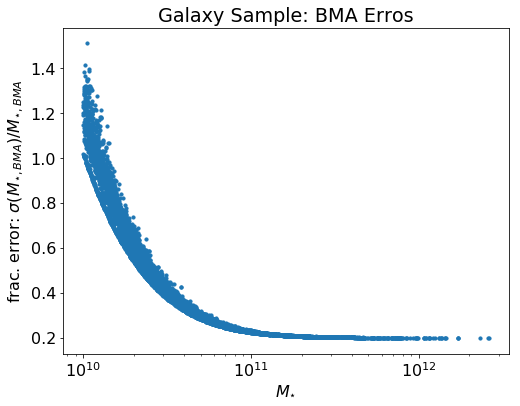

In [72]:
plt.figure(figsize=(8,6))
plt.scatter(smass[idx],(smassErr[idx]/smass[idx]),s=10)
plt.xscale('log')
plt.xlabel(r'$M_{\star}$')
plt.ylabel('frac. error: $\sigma(M_{\star,BMA})/M_{\star,BMA}$')
plt.title('Galaxy Sample: BMA Erros')
# save_figures(plt,1,is_tight=True)

In [73]:
mustar2 = np.array([np.nansum(pmem[idx]*smass[idx]) for idx in keys])
mustarErr2 = np.sqrt(np.array([np.nansum((pmem[idx]*smassErr[idx])**2) for idx in keys]))

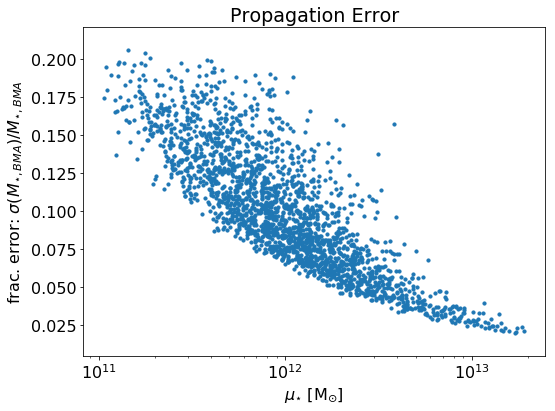

In [74]:
plt.figure(figsize=(8,6))
plt.scatter(mustar,mustarErr2/mustar2,s=10)
plt.xscale('log')
plt.xlabel(mulabel)
plt.ylabel('frac. error: $\sigma(M_{\star,BMA})/M_{\star,BMA}$')
plt.title('Propagation Error')
save_figures(plt,2,is_tight=True)

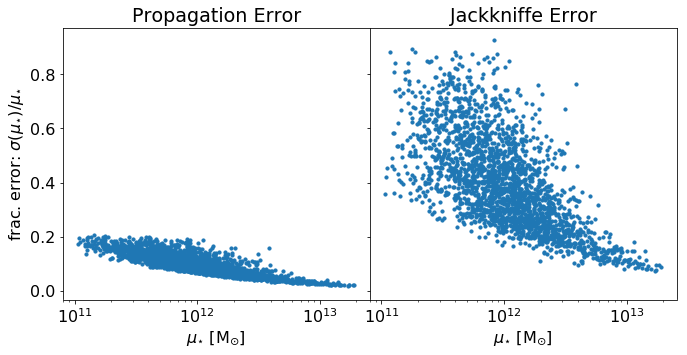

In [75]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11,5), sharey='all', sharex='all')
fig.subplots_adjust(wspace=0.0)

ax1.scatter(mustar,mustarErr2/mustar2,s=10)
ax1.set_xscale('log')
ax1.set_xlabel(mulabel)
ax1.set_ylabel('frac. error: $\sigma(\mu_{\star})/\mu_{\star}$')
ax1.set_title('Propagation Error')

ax2.scatter(mustar,mustarErr/mustar,s=10)
ax2.set_xscale('log')
ax2.set_xlabel(mulabel)
# ax2.set_ylabel('frac. error: $\sigma(M_{\star,BMA})/M_{\star,BMA}$')
ax2.set_title('Jackkniffe Error')

save_figures(plt,0,is_tight=False)


# Expected Error

Taking only in consideration the membership probabilities

In [76]:
def makeBin(variable, xedges):
    xbins = (xedges[1:]+xedges[:-1])/2
    indices = [ np.where((variable >= xedges[i]) & (variable <= xedges[i + 1]))[0] for i in range(len(xedges)-1)]
    return indices, xbins

# muStarBins = np.percentile(mustar,np.linspace(0,100,21))
muStarBins = np.logspace(11.4,np.log10(0.99*np.max(mustarTrue)),11)

In [77]:
# muStarBins

In [78]:
def get_sigma68(x):
    s1,s2,s3 = np.nanpercentile(x, [16,50,84])
    return 0.5*(s3-s1)

In [79]:
msKeys, muStarB = makeBin(mustarTrue, muStarBins)

muResBin = np.array([np.mean(mustar[ix]/mustarTrue[ix]) for ix in msKeys])
muErrTrueBin = 10**np.array([get_sigma68(np.log10(mustar[ix]/mustarTrue[ix])) for ix in msKeys])-1

Text(0.5,0,'$\\mu_{\\star}$ [M$_{\\odot}$]')

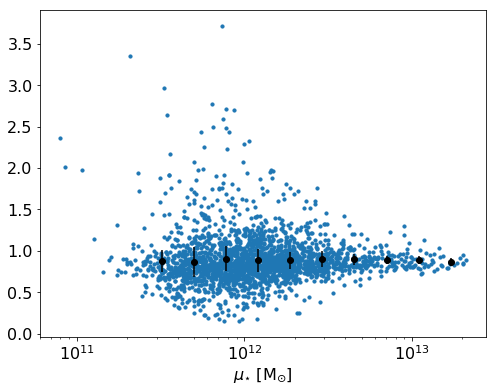

In [80]:
plt.figure(figsize=(8,6))
plt.scatter(mustarTrue,mustar/mustarTrue, s=10)
plt.errorbar(muStarB, muResBin, yerr=0.5*muErrTrueBin, fmt='o', color='k')
plt.xscale('log')
plt.xlabel(mulabel)
# plt.ylabel('frac. error: $\sigma(M_{\star,BMA})/M_{\star,BMA}$')
# plt.title('Propagation Error')
# save_figures(plt,2,is_tight=True)

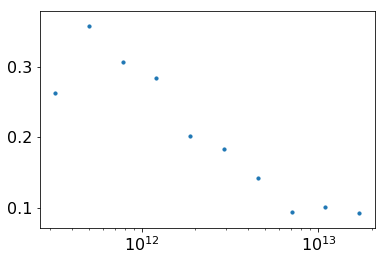

In [81]:
plt.scatter(muStarB,muErrTrueBin,s=10)
plt.xscale('log')

In [82]:
muErrTrue = np.interp(mustarTrue, muStarB, muErrTrueBin)

In [83]:
ratio1 = mustarErr/muErrTrue/mustar
ratio2 = mustarErr2/muErrTrue/mustar

ratio1_bin = np.array([np.nanmean(mustarErr[ix]/muErrTrue[ix]/mustar[ix]) for ix in msKeys])
ratio1_err_bin = np.array([np.nanstd(mustarErr[ix]/muErrTrue[ix]/mustar[ix]) for ix in msKeys])

ratio2_bin = np.array([np.nanmean(mustarErr2[ix]/muErrTrue[ix]/mustar[ix]) for ix in msKeys])
ratio2_err_bin = np.array([np.nanstd(mustarErr2[ix]/muErrTrue[ix]/mustar[ix]) for ix in msKeys])

0.382129555189975


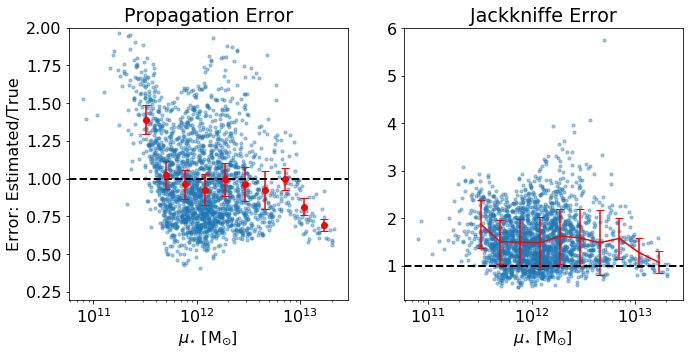

In [84]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11,5), sharey=False, sharex='all')
fig.subplots_adjust(wspace=0.2)

mean2 = np.mean(ratio2)
print(mean2)
ax1.scatter(mustarTrue, ratio2/mean2,s=10,alpha=0.4)
ax1.errorbar(muStarB, ratio2_bin/mean2, yerr=ratio2_err_bin, color='r', capsize=4, fmt='o')

ax1.axhline(1.,ls='--',color='k', lw=2)
ax1.set_xscale('log')
ax1.set_xlabel(mulabel)
ax1.set_ylabel('Error: Estimated/True')
ax1.set_title('Propagation Error')
ax1.set_ylim(0.2, 2.)

ax2.scatter(mustarTrue,ratio1,s=10,alpha=0.4)
ax2.errorbar(muStarB, ratio1_bin, yerr=ratio1_err_bin, color='r', capsize=4)
ax2.axhline(1.,ls='--',color='k', lw=2)
ax2.set_xscale('log')
ax2.set_xlabel(mulabel)
ax2.set_title('Jackkniffe Error')

save_figures(plt,1,is_tight=False)

In [85]:
muErrPropBin = np.array([np.nanmean(mustarErr2[ix]/mustar[ix]) for ix in msKeys])
muErrJackBin = np.array([np.nanmean(mustarErr[ix]/mustar[ix]) for ix in msKeys])

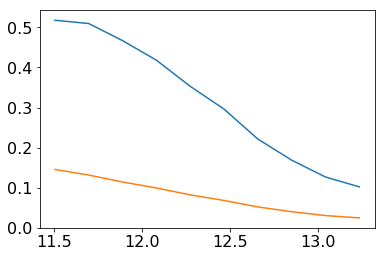

In [86]:
plt.plot(np.log10(muStarB), muErrJackBin)
plt.plot(np.log10(muStarB), muErrPropBin)

In [87]:
np.save('muStarErrorModel_true',np.vstack([muStarB,muErrTrueBin]))
np.save('muStarErrorModel_prop',np.vstack([muStarB,muErrPropBin]))
np.save('muStarErrorModel_jack',np.vstack([muStarB,muErrJackBin]))
# np.save(muErrTrue,'muStarErrorModel_propagation')
# np.save(muErrTrue,'muStarErrorModel_jackKniffe')

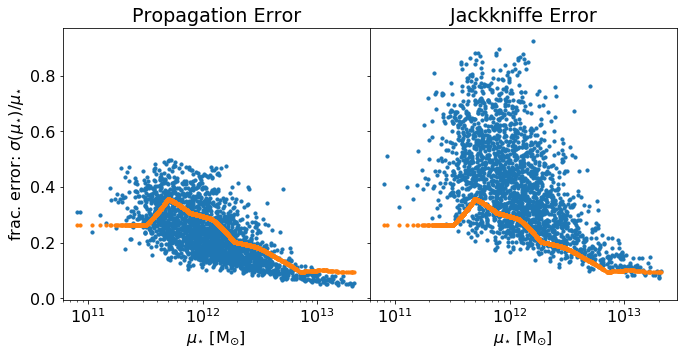

In [30]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11,5), sharey='all', sharex='all')
fig.subplots_adjust(wspace=0.0)

ax1.scatter(mustarTrue,mustarErr2/mustar2,s=10)
ax1.scatter(mustarTrue, muErrTrue, s=10)
ax1.set_xscale('log')
ax1.set_xlabel(mulabel)
ax1.set_ylabel('frac. error: $\sigma(\mu_{\star})/\mu_{\star}$')
ax1.set_title('Propagation Error')

ax2.scatter(mustarTrue,mustarErr/mustar,s=10)
ax2.scatter(mustarTrue, muErrTrue, s=10)
ax2.set_xscale('log')
ax2.set_xlabel(mulabel)
# ax2.set_ylabel('frac. error: $\sigma(M_{\star,BMA})/M_{\star,BMA}$')
ax2.set_title('Jackkniffe Error')

save_figures(plt,0,is_tight=False)


## Comparing with $\mu_{\star,true}$ Error

In [31]:
mustarTrueErr = datas[run]['y2err']
true = np.array(gal['True']).astype(int)

In [32]:
mustarT = np.array([np.nansum(true[idx]*smass[idx]) for idx in keys])
mustarTrueErr2 = np.sqrt(np.array([np.nansum((true[idx]*smassErr[idx])**2) for idx in keys]))

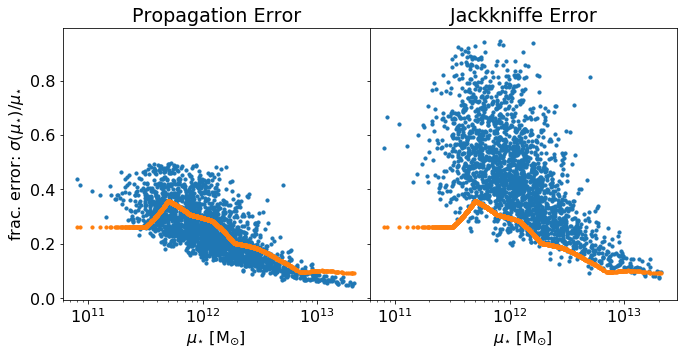

In [33]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11,5), sharey='all', sharex='all')
fig.subplots_adjust(wspace=0.0)

ax1.scatter(mustarTrue, mustarTrueErr2/mustarTrue,s=10)
ax1.scatter(mustarTrue, muErrTrue, s=10)
ax1.set_xscale('log')
ax1.set_xlabel(mulabel)
ax1.set_ylabel('frac. error: $\sigma(\mu_{\star})/\mu_{\star}$')
ax1.set_title('Propagation Error')

ax2.scatter(mustarTrue, mustarTrueErr/mustarTrue, s=10)
ax2.scatter(mustarTrue, muErrTrue, s=10)
ax2.set_xscale('log')
ax2.set_xlabel(mulabel)
# ax2.set_ylabel('frac. error: $\sigma(M_{\star,BMA})/M_{\star,BMA}$')
ax2.set_title('Jackkniffe Error')

save_figures(plt,0,is_tight=False)


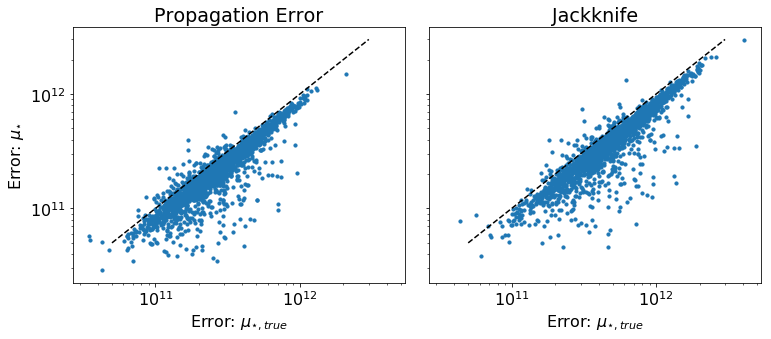

In [34]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11,5), sharey='all', sharex='all')
fig.subplots_adjust(wspace=0.0)

ax1.loglog()
ax1.plot([5e10, 3e12],[5e10, 3e12],'k--')
ax1.scatter(mustarTrueErr2, mustarErr2, s=10)
ax1.set_ylabel('Error: $\mu_{\star}$')
ax1.set_xlabel('Error: $\mu_{\star,true}$')
ax1.set_title('Propagation Error')

ax2.loglog()
ax2.plot([5e10, 3e12],[5e10, 3e12],'k--')
ax2.scatter(mustarTrueErr, mustarErr, s=10)
# ax2.set_ylabel('Error: $\mu_{\star}$')
ax2.set_xlabel('Error: $\mu_{\star,true}$')
ax2.set_title('Jackknife')
save_figures(fig,3,is_tight=True)

-0.00369949899201754


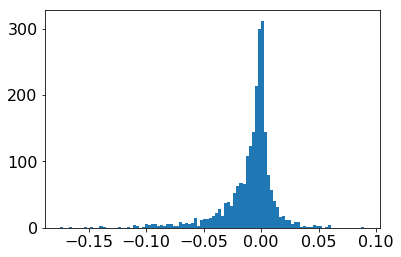

In [35]:
diff = ((mustarErr2/mustar)**2-(mustarTrueErr2/mustarTrue)**2)

print(np.median(diff))
_ = plt.hist(diff,bins=100)

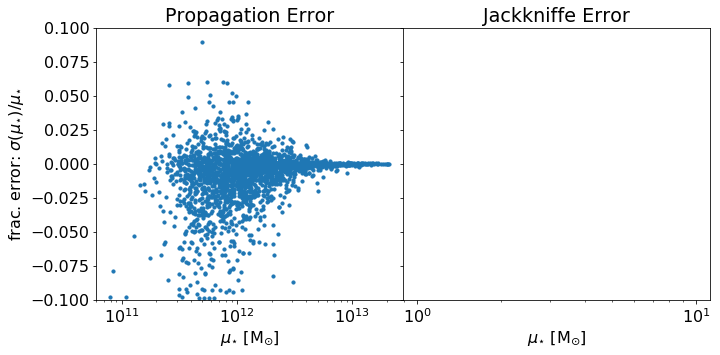

In [36]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11,5), sharey='all')
fig.subplots_adjust(wspace=0.0)

ax1.scatter(mustarTrue, diff ,s=10)
ax1.set_xscale('log')
ax1.set_xlabel(mulabel)
ax1.set_ylabel('frac. error: $\sigma(\mu_{\star})/\mu_{\star}$')
ax1.set_title('Propagation Error')
ax1.set_ylim(-0.1, 0.1)

# ax2.scatter(mustarTrue, mustarTrueErr/mustarErr,s=10)
ax2.set_xscale('log')
ax2.set_xlabel(mulabel)
# ax2.set_ylabel('frac. error: $\sigma(M_{\star,BMA})/M_{\star,BMA}$')
ax2.set_title('Jackkniffe Error')

save_figures(plt,0,is_tight=False)


In [37]:
ratio3 = mustarTrueErr/muErrTrue/mustarTrue
ratio4 = mustarTrueErr2/muErrTrue/mustarTrue

ratio3_bin = np.array([np.nanmean(ratio3[ix]) for ix in msKeys])
ratio3_err_bin = np.array([np.nanstd(ratio3[ix]) for ix in msKeys])

ratio4_bin = np.array([np.nanmean(ratio4[ix]) for ix in msKeys])
ratio4_err_bin = np.array([np.nanstd(ratio4[ix]) for ix in msKeys])

0.8881481173881787


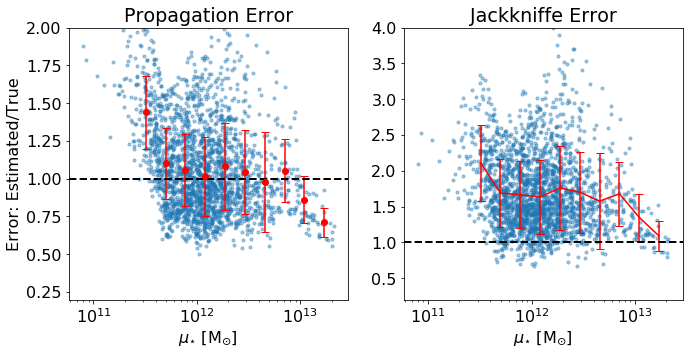

In [38]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11,5), sharey=False, sharex='all')
fig.subplots_adjust(wspace=0.2)

mean2 = np.mean(ratio2)
print(mean2)
ax1.scatter(mustarTrue, ratio4/mean2,s=10,alpha=0.4)
ax1.errorbar(muStarB, ratio4_bin/mean2, yerr=ratio4_err_bin, color='r', capsize=4, fmt='o')

ax1.axhline(1.,ls='--',color='k', lw=2)
ax1.set_xscale('log')
ax1.set_xlabel(mulabel)
ax1.set_ylabel('Error: Estimated/True')
ax1.set_title('Propagation Error')
ax1.set_ylim(0.2, 2.)

ax2.scatter(mustarTrue,ratio3,s=10,alpha=0.4)
ax2.errorbar(muStarB, ratio3_bin, yerr=ratio3_err_bin, color='r', capsize=4)
ax2.axhline(1.,ls='--',color='k', lw=2)
ax2.set_xscale('log')
ax2.set_xlabel(mulabel)
ax2.set_title('Jackkniffe Error')
ax2.set_ylim(0.2, 4.)

save_figures(plt,1,is_tight=False)